# Regularization Techniques 

Regularization technique used in deep learning to prevent overfitting by adding a penalty term to the loss function.


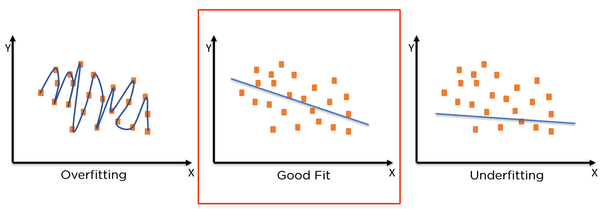

There are several types of regularization techniques for neural networks. We’ll discuss **L1 and L2 regularization techniques** and their Keras implementation.

Both L1 and L2 regularization techniques fall under the category of **weight/parameter regularization**. This type of regularization keeps the weights of the neural network small (near zero) by adding a penalizing term to the loss function.

This penalty term discourages large weights in the neural network, leading to a simpler model that generalizes better to unseen data.

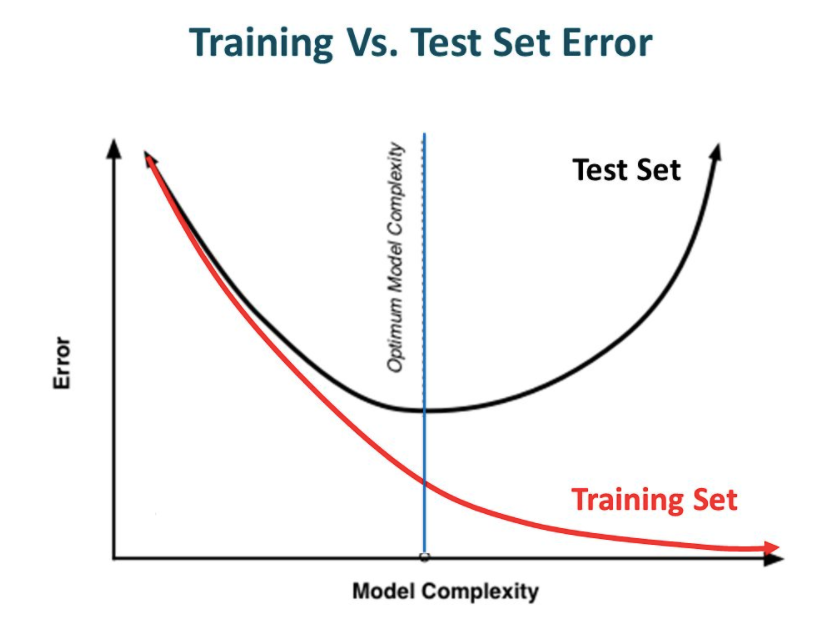

Let's explore Overfitting.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import make_moons

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

2024-04-19 11:25:28.977646: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 11:25:28.977850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 11:25:29.175082: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
input_, target_ = make_moons(200, noise=0.25,random_state=2)

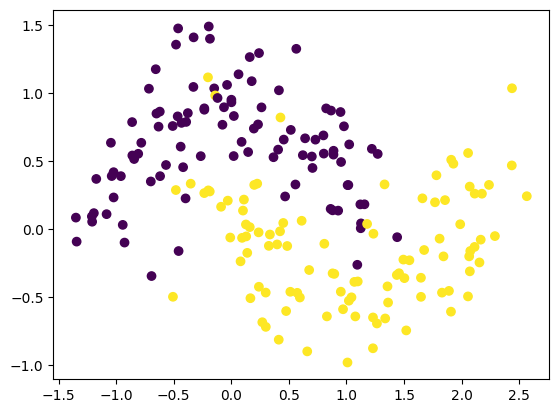

In [5]:
plt.scatter(x = input_[:,0], y = input_[:,1], c=target_)
plt.show()

In [6]:
model_1 = Sequential()

model_1.add(Dense(128,input_dim=2, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1,activation='sigmoid'))

model_1.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
adam = Adam(learning_rate=0.01)
model_1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history_1 = model_1.fit(input_, target_, epochs=500, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


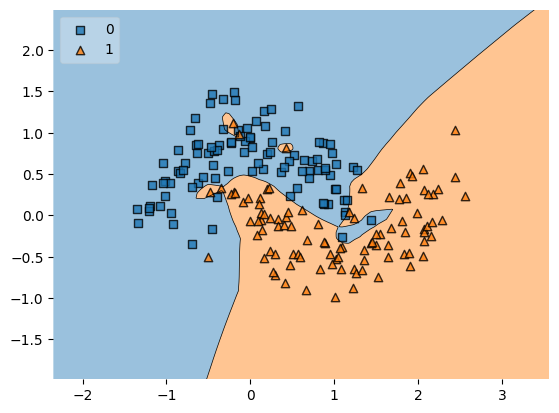

In [12]:
plot_decision_regions(input_, target_.astype('int'), clf=model_1, legend=2)
plt.show()

Evidently, overfitting is happening.

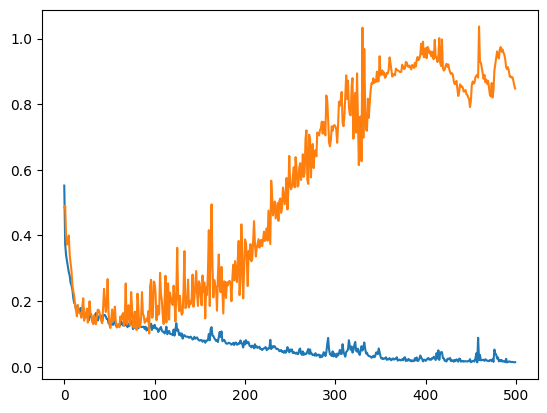

In [13]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

Validation Score is decreasing.

## Types of regularization techniques

Regularization is a technique used to address overfitting by directly changing the architecture of the model by modifying the model’s training process. The following are the commonly used regularization techniques:

# L2 Norm (Ridge) (Weight decay)

The L2 term which is added to the end of the loss/cost function(aka L2 norm) is defined as:

### **||W|| = sqrt(w0² + w1² + w2² + ….. + wn²)**

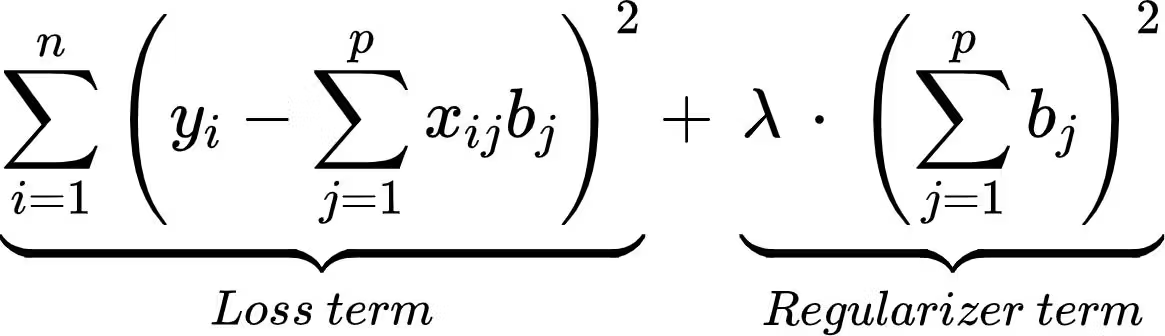

where, 

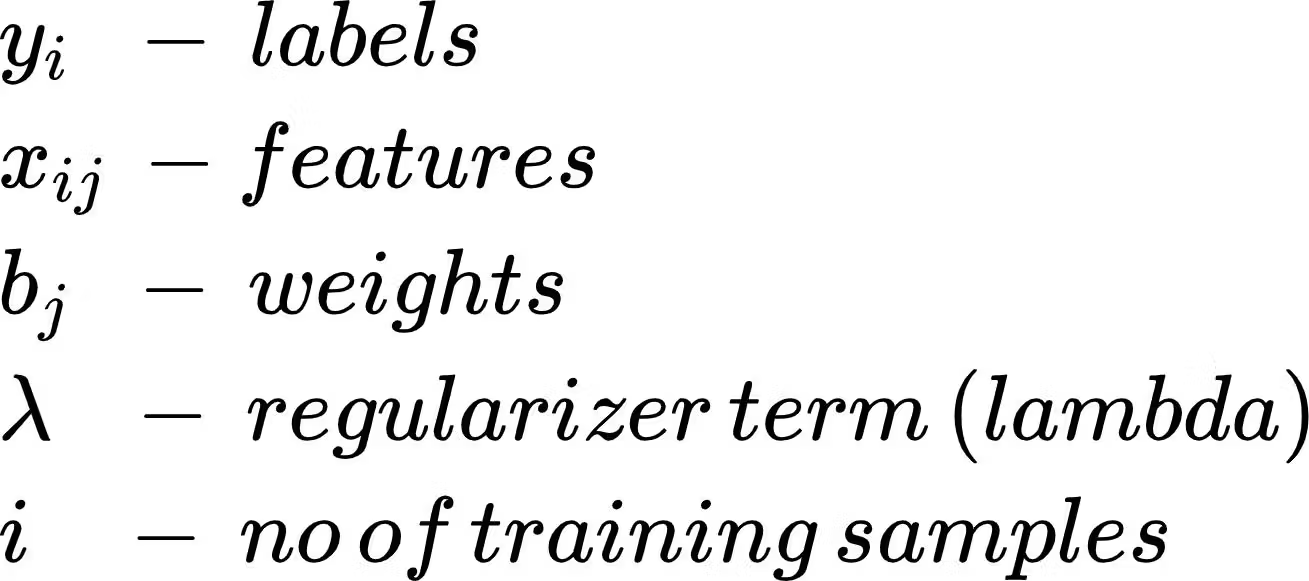

-- L2 Norm leads Dense models with all weights shrunk proportionally/ approximately 0 but never exactly be 0.

### L2 Regularization

In [19]:
model_2 = Sequential()

model_2.add(Dense(128,input_dim=2, activation="relu", kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model_2.add(Dense(128, activation="relu", kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model_2.add(Dense(1,activation='sigmoid'))

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
adam = Adam(learning_rate=0.01)
model_2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history_2 = model_2.fit(input_, target_, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


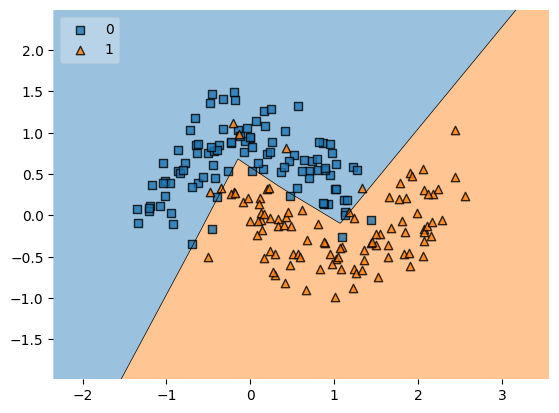

In [21]:
plot_decision_regions(input_, target_.astype('int'), clf=model_2, legend=2)
plt.show()

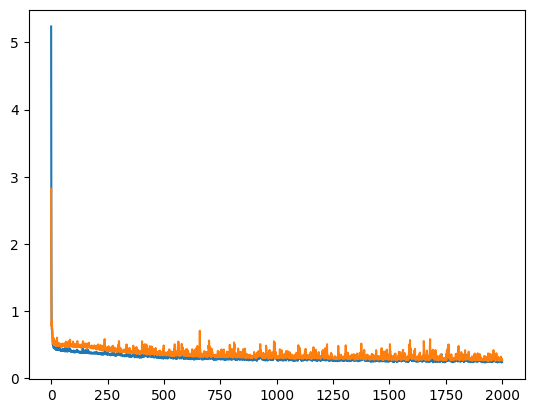

In [22]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

Clearly, overfitting is reduced.

# L1 Norm (Lasso)

The L1 term which is added to the end of the loss/cost function(aka L1 norm) is defined as:


### **||W|| = (|w0| + |w1| + |w2| + ….. + |wn|)**

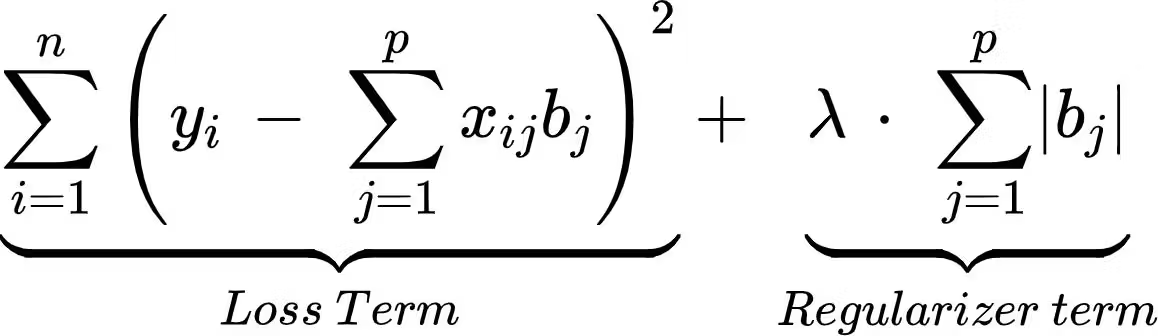

where, 

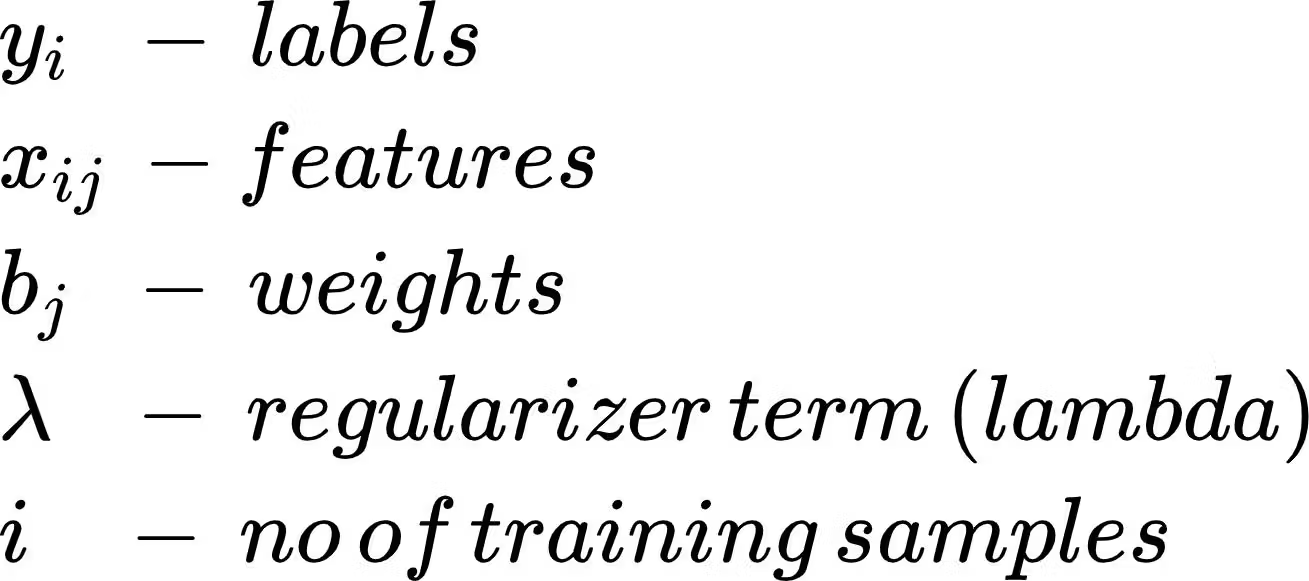

This creates a sparse model with many weights values set to 0. This enables us to use L1 regularization as a feature selector as it discards some weight values. 

This is favorable in scenarios where embeddings are used as fewer weight values means less storage and calculations required during training and predictions.

## L1 Regularization

In [23]:
model_3 = Sequential()

model_3.add(Dense(128,input_dim=2, activation="relu", kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model_3.add(Dense(128, activation="relu", kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model_3.add(Dense(1,activation='sigmoid'))

model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
adam = Adam(learning_rate=0.01)
model_3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history_3 = model_3.fit(input_, target_, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


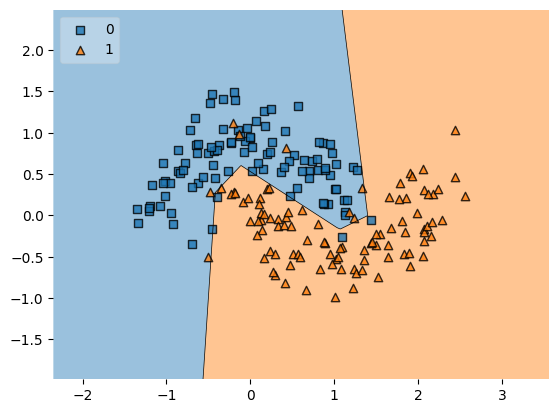

In [25]:
plot_decision_regions(input_, target_.astype('int'), clf=model_3, legend=2)
plt.show()

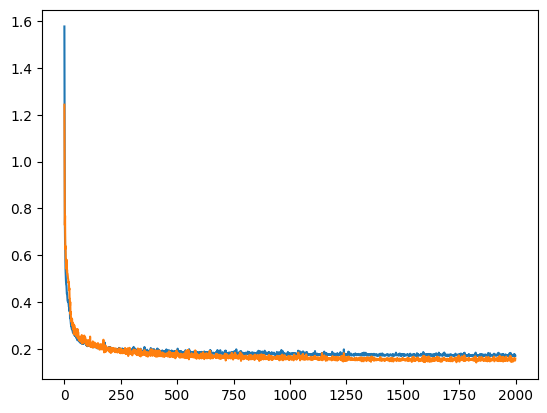

In [27]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])

Clearly overfitting is not there!

### Difference btw L1 and L2 Regularization

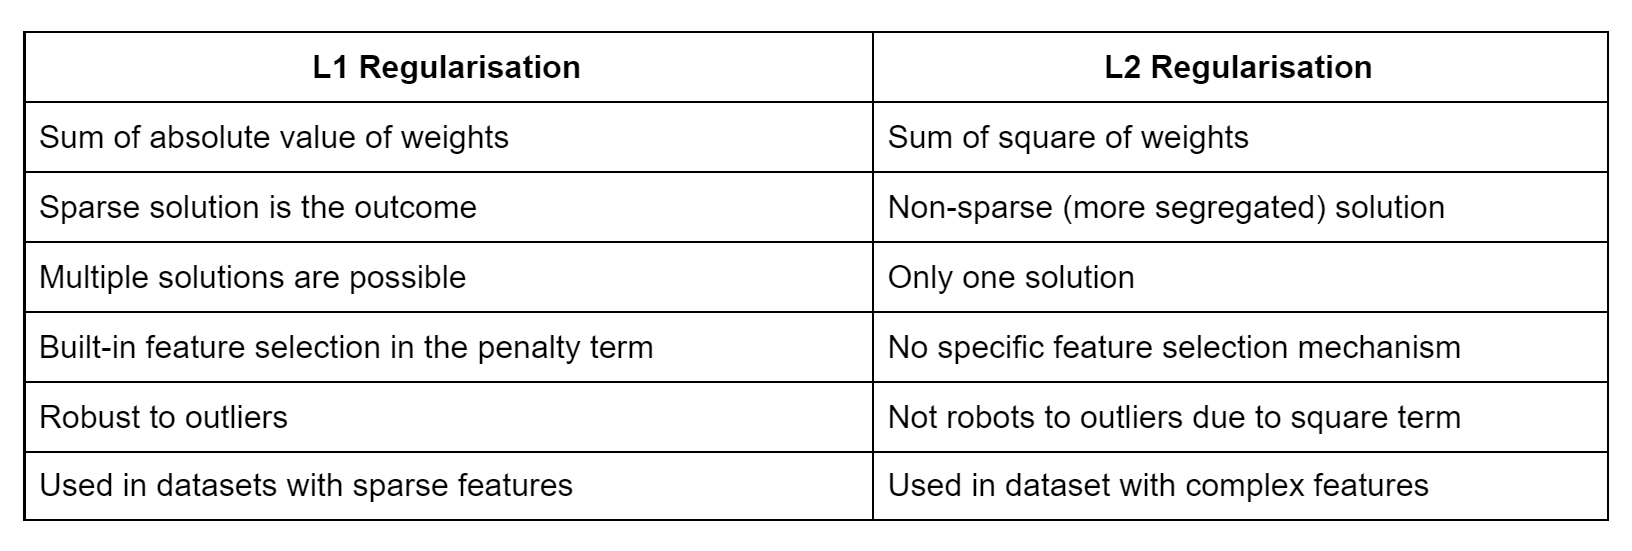

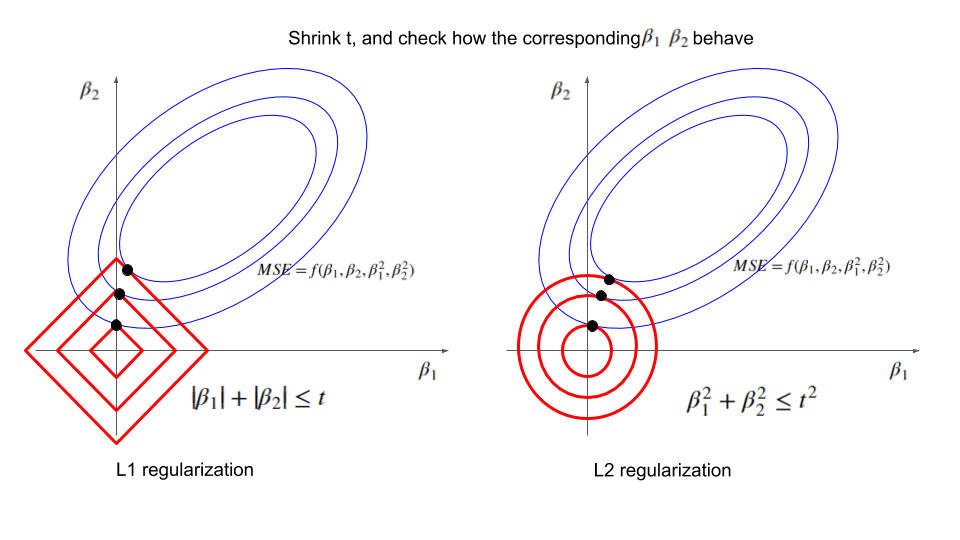

> Stay tuned for more and Don't forget to **Star** this Github Repository for more such contents.